Homework 4
==========

In this homework...

* Extend the zeolite exercise by fitting a multivariable linear regression with LASSO regularization

* Compare LASSO and RIDGE regression

Problem Statement
-----------------

1. Why do we apply regularization techniques? Comment on the differences between RIDGE and LASSO regularization. Specifically, which regularization technique produces weights of zero, and why would you want to use LASSO instead of RIDGE?

2. We provide standardized data from the zeolite exercise. Fit this data using the following models and report the resulting $R^2$ values. Which model produces the strongest $R^2$? **Hint:** Apply the `LinearRegression`, `Ridge`, and `Lasso` classes in `sklearn.linear_model`.

    (a) Standard linear regression

    (b) Ridge regression ($\lambda = 1$)

    (c) Lasso regression ($\lambda = 1$)

3. Randomly isolate 50 % of the zeolite examples in what is called the "training set." Assign the remaining 50 % of examples to a "test set." You will learn more about training/test splits during week 5. Fit the same three models from problem 2 on the training set, and evaluate $R^2$ on the test set. **Hint:** Use the `train_test_split` function from `sklearn.model_selection` to separate the training and test sets.

4. What do you notice about the value of $R^2$ in the training and test sets for the standard linear regression and regularized regression models? What do discrepancies in $R^2$ values tell us about overfitting?

5. Re-fit the lasso regression model from problem 2 on the training set for the following values of $\lambda$: 0.1, 0.25, 0.5, 0.75, 0.9. Evaluate the $R^2$ value of each model on the test set. Describe the effect of $\lambda$ on model generalizability. Notice that `sklearn.linear_model` accepts the regularization parameter $\lambda$ in the optional argument "alpha" during class initialization. 

6. For each lasso regression model from problem 5, plot the magnitude of coefficients for the top 20 contributing covariates.
How does changing $\lambda$ affect the magnitude of these coefficients?

Import modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Load and standardize data from: [DFT training set from Evans, Jack D., and François-Xavier Coudert. "Predicting the mechanical properties of zeolite frameworks by machine learning." Chemistry of Materials 29, no. 18 (2017): 7833-7839.]

For demonstration purposes, we will add 1000 normally distributed covariates to the data set.
These covariates contain no information, and including the covariates in the model is expected to cause overfitting. 

In [7]:
# Load
data = pd.read_csv("data/zeolite_mech.csv", low_memory = False)
covariate_name = ['density', 'spg', 'volume', 'SiOSi_average', 'SiO_average', 'max_dim',
                  'largest_free_sphere', 'VolFrac', 'ASA', 'AV']
x = np.array(data['g_gbr'])
t = np.array(data[covariate_name])

# Add normally distributed, random features
len_rand_coefs = 1000
fake_data = np.random.normal(size=(len(data), len_rand_coefs))
t = np.concatenate((t, fake_data), axis=1)
fake_coefs = ["rand_"+str(i) for i in range(len_rand_coefs)]
covariate_name = covariate_name + fake_coefs

# Standardize
n_e = len(x)
n_t = len(t[0,:])
t_cen = np.zeros((n_e, n_t))
x_cen = (x - np.sum(x) / n_e)
x_cen /= np.sqrt(np.sum(x_cen ** 2) / (n_e - 1))
for i in range(n_t):
    t_cen[:, i] = (t[:, i] - np.sum(t[:, i]) / n_e)
    t_cen[:, i] /= np.sqrt(np.sum(t_cen[:, i] ** 2) / (n_e - 1))

Solutions
---------

1. Why do we apply regularization techniques? Comment on the differences between RIDGE and LASSO regularization. Specifically, which regularization technique produces weights of zero, and why would you want to use LASSO instead of RIDGE?

Regularization is used to simplify a model for fitting data by minimizing contribution from the less significant covariates. By applying regularization, a model is developed around the covariates which have the largest impact on fitting the data, i.e. covariates with the largest coefficients in terms of magnitude. Both RIDGE and LASSO utilize a cost function to bias towards minimizing the non-contributing coefficients. The RIDGE contribution to the cost function is quadratic with a (a fit parameter), while the LASSO contribution is linear with a. The RIDGE algorithm proportionally reduces all of the coefficients in the model by the same constant, regardless of the magnitude of the coefficient. While LASSO is more effective at filtering the coefficients that are smaller because the algorithm is biased based on the magnitude of the coefficient. LASSO will produce weights of zero once they have passed a certain threshold, while RIDEG will never actually have a weight of zero, it will only approach it. It is beneficial to use LASSO instead of RIDGE when fitting data with many covariates where a significant amount of them are suspected to be insignficant, because then their weights can actually be set to zero.

2. We provide standardized data from the zeolite exercise. Fit this data using the following models and report the resulting $R^2$ values. Which model produces the strongest $R^2$? **Hint:** Apply the `LinearRegression`, `Ridge`, and `Lasso` classes in `sklearn.linear_model`.

    (a) Standard linear regression

    (b) Ridge regression ($\lambda = 1$)

    (c) Lasso regression ($\lambda = 1$)

In [86]:
lam = 1
lin_reg = linear_model.LinearRegression(fit_intercept = False)
fit_reg = lin_reg.fit(t_cen, x_cen)
r2_reg = fit_reg.score(t_cen,x_cen)
print('Linear regression:', r2_reg)

ridge = linear_model.Ridge(alpha=lam, fit_intercept = False)
fit_ridge = ridge.fit(t_cen, x_cen)
r2_ridge = fit_ridge.score(t_cen,x_cen)
print('Ridge:', r2_ridge)

lasso = linear_model.Lasso(alpha=lam, fit_intercept = False)
fit_lasso = lasso.fit(t_cen, x_cen)
r2_lasso = fit_lasso.score(t_cen,x_cen)
print('Lasso:', r2_lasso)

Linear regression: 1.0
Ridge: 0.9999989983164126
Lasso: 0.0


Both linear regression and RIDGE have the similarly strong R2 values of ~1.

3. Randomly isolate 50 % of the zeolite examples in what is called the "training set." Assign the remaining 50 % of examples to a "test set." You will learn more about training/test splits during week 5. Fit the same three models from problem 2 on the training set, and evaluate $R^2$ on the test set. **Hint:** Use the `train_test_split` function from `sklearn.model_selection` to separate the training and test sets.

In [87]:
t_cen_train, t_cen_test, x_cen_train, x_cen_test = train_test_split(t_cen, x_cen, test_size = 0.5, shuffle=True)
lam = 1
lin_reg_50 = linear_model.LinearRegression(fit_intercept = False)
fit_reg_50 = lin_reg_50.fit(t_cen_train, x_cen_train)
r2_reg_test = fit_reg_50.score(t_cen_test, x_cen_test)
print('Linear regression:', r2_reg_test)

ridge_50 = linear_model.Ridge(alpha=lam, fit_intercept = False)
fit_ridge_50 = ridge_50.fit(t_cen_train, x_cen_train)
r2_ridge_test = fit_ridge_50.score(t_cen_test,x_cen_test)
print('Ridge:', r2_ridge_test)

lasso_50 = linear_model.Lasso(alpha=lam, fit_intercept = False)
fit_lasso_50 = lasso_50.fit(t_cen_train, x_cen_train)
r2_lasso_test = fit_lasso_50.score(t_cen_test,x_cen_test)
print('Lasso:', r2_lasso_test)

Linear regression: 0.2756660688702407
Ridge: 0.27562930244312356
Lasso: -0.0003647362901373352


4. What do you notice about the value of $R^2$ in the training and test sets for the standard linear regression and regularized regression models? What do discrepancies in $R^2$ values tell us about overfitting?

Lasso and linear regression have strong performance when the entire data set is modeled (Q2). But when we try to apply the model of a training set to a test set, we see a relatively poor fit for both linear regression and RIDGE, and even worse for LASSO. The low R2 values (less then 0.5, but greater than 0) indicate that the model performed well at fitting the training set (since a large number of covariates and therefore more flexibility), but it appears to be too accurate of a fit that it could not be applied to other data sets such as the test data. This is known as over-fitting and reduces the generalizability of the model. The negative R2 value for the lasso model indicates that we are under-fitting the model due to over-penalizing.

5. Re-fit the lasso regression model from problem 2 on the training set for the following values of $\lambda$: 0.1, 0.25, 0.5, 0.75, 0.9. Evaluate the $R^2$ value of each model on the test set. Describe the effect of $\lambda$ on model generalizability. Notice that `sklearn.linear_model` accepts the regularization parameter $\lambda$ in the optional argument "alpha" during class initialization.

In [90]:
lam_lasso = [0.1, 0.25, 0.5, 0.75, 0.9]
for lam in lam_lasso:
    lasso_lam = linear_model.Lasso(alpha=lam, fit_intercept = False)
    fit_lasso_lam = lasso_lam.fit(t_cen_train, x_cen_train)
    r2_lasso_lam = fit_lasso_lam.score(t_cen_test,x_cen_test)
    print('Lambda=', lam, ':', r2_lasso_lam)

Lambda= 0.1 : 0.7659998995525089
Lambda= 0.25 : 0.7545569516043661
Lambda= 0.5 : 0.545134921004281
Lambda= 0.75 : 0.20112061502165546
Lambda= 0.9 : -0.0003647362901373352


With decreasing lambda, we see that the model becomes more generalizable since the R2 values are improving in fitting the test data set.

6. For each lasso regression model from problem 5, plot the magnitude of coefficients for the top 20 contributing covariates.
How does changing $\lambda$ affect the magnitude of these coefficients?

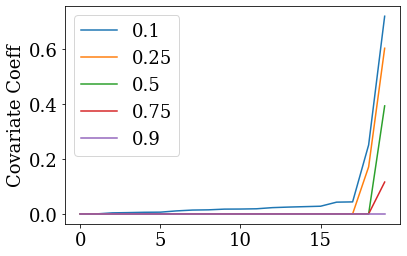

In [91]:
lam_lasso = [0.1, 0.25, 0.5, 0.75, 0.9]
#coeffs = np.zeros((len(lam_lasso), 20))

plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i in range(len(lam_lasso)):
    lasso = linear_model.Lasso(alpha=lam_lasso[i]).fit(t_cen_train, x_cen_train)
    coeffs_all = lasso.coef_
    ind = np.argsort(np.abs(coeffs_all))
    coeffs_top20 = coeffs_all[ind][-20:]
    #ind20 = ind[-20:]
    #print(ind20)
    #covariates = covariate_name[ind20] couldn't figure out how to plot covariate names:(
    
    plt.plot(np.abs(coeffs_top20), label=lam_lasso[i])
    plt.legend()
    plt.ylabel('Covariate Coeff')

Increasing lambda decreases the magnitude of the covariates.